In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv("cleaned_final.csv")

In [2]:
pd.set_option('display.max_columns', None)
display(df.head(10))
df.shape

,PM10,SO2,CO,NO2,NOX,NO,O3,temp,feelslike,humidity,dew,windgust,windspeed,pressure,visibility,cloudcover,solarradiation,hour,day,month,dayofweek,season,wind_dir_rad,wind_dir_sin,wind_dir_cos,weather_group_code,is_weekend,is_nighttime,is_rush_hour
0,47.976,2.622,633.510,91.5125,123.564,44.600,4.0,10.0,10.0,87.38,8.0,16.6,9.4,1020.0,9.0,50.0,0.0,0,2,1,6,1,4.363323,-0.939693,-0.342020,0,1,1,0
1,50.498,2.786,537.026,90.1475,121.566,43.642,3.6,10.0,10.0,87.38,8.0,15.5,13.0,1021.0,10.0,50.0,0.0,1,2,1,6,1,4.537856,-0.984808,-0.173648,0,1,1,0
2,47.264,3.456,615.502,102.6875,119.832,39.820,3.4,10.0,10.0,87.38,8.0,15.8,13.0,1021.0,10.0,50.0,0.0,2,2,1,6,1,4.537856,-0.984808,-0.173648,0,1,1,0
3,46.026,3.260,693.612,82.3575,120.728,46.062,3.7,10.0,10.0,87.38,8.0,15.5,5.4,1021.0,10.0,50.0,0.0,3,2,1,6,1,4.363323,-0.939693,-0.342020,0,1,1,0
4,47.514,3.252,626.874,54.8325,97.116,41.600,4.0,9.0,9.0,93.45,8.0,14.4,0.0,1021.0,10.0,50.0,0.0,4,2,1,6,1,0.000000,0.000000,1.000000,0,1,1,0
5,35.986,2.804,534.234,45.3900,79.562,34.480,10.2,10.0,10.0,87.38,8.0,13.3,5.4,1022.0,9.0,50.0,0.0,5,2,1,6,1,4.188790,-0.866025,-0.500000,0,1,1,0
6,24.658,2.578,485.968,41.1200,72.358,32.818,9.5,9.0,9.0,93.45,8.0,14.4,0.0,1022.0,9.0,89.2,0.0,6,2,1,6,1,0.000000,0.000000,1.000000,0,1,0,0
7,20.576,2.950,511.080,55.5300,84.790,33.660,4.2,10.0,10.0,87.38,8.0,15.5,0.0,1022.0,9.0,89.2,0.0,7,2,1,6,1,0.000000,0.000000,1.000000,0,1,0,1
8,41.242,3.490,511.342,56.9525,86.722,38.240,13.8,11.0,11.0,87.48,9.0,14.8,11.2,1025.0,10.0,89.2,191.9,12,2,1,6,1,0.174533,0.173648,0.984808,0,1,0,0
9,35.980,3.314,572.252,47.3400,74.762,35.284,15.7,11.0,11.0,87.48,9.0,16.2,9.4,1025.0,10.0,89.2,141.4,13,2,1,6,1,0.349066,0.342020,0.939693,0,1,0,0


(23782, 29)

In [ ]:
import xgboost as xgb
import numpy as np
import pickle
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, median_absolute_error,
    mean_absolute_percentage_error, explained_variance_score, max_error, r2_score
)
from sklearn.model_selection import train_test_split

def evaluate_xgb_pm10_default(df, target='PM10'):
    selected_features = [
        'temp', 'feelslike', 'humidity', 'dew', 'windgust',
        'windspeed', 'pressure', 'cloudcover', 'visibility',
        'solarradiation', 'weather_group_code',
        'hour', 'day', 'month', 'dayofweek', 'season',
        'wind_dir_rad', 'wind_dir_sin', 'wind_dir_cos',
        'humidity_level', 'feelslike_diff', 
        'is_weekend', 'is_nighttime', 'is_rush_hour',
        'humid_heat_index', 'uv_level'
    ]

    X = df[selected_features]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = xgb.XGBRegressor(random_state=42)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metirkler
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mape = mean_absolute_percentage_error(y_test, y_test_pred)
    medae = median_absolute_error(y_test, y_test_pred)
    evs = explained_variance_score(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    maxerr = max_error(y_test, y_test_pred)

    print("PM10 - XGBoost (Default) Performansı:")
    print(f"Train MAE: {mae_train:.2f} | Test MAE: {mae_test:.2f}")
    print(f"Train RMSE: {rmse_train:.2f} | Test RMSE: {rmse_test:.2f}")
    print(f"MAPE (Test): {mape*100:.2f}%")
    print(f"Median AE (Test): {medae:.2f}")
    print(f"Explained Variance Score: {evs:.4f}")
    print(f"Train R² Score: {r2_train:.4f} | Test R² Score: {r2:.4f}")
    print(f"Max Error: {maxerr:.2f}")

    


In [6]:
evaluate_xgb_pm10_default(df)

PM10 - XGBoost (Default) Performansı:
Train MAE: 4.77 | Test MAE: 6.58
Train RMSE: 6.33 | Test RMSE: 8.71
MAPE (Test): 18.87%
Median AE (Test): 5.10
Explained Variance Score: 0.6514
Train R² Score: 0.8211 | Test R² Score: 0.6512
Max Error: 48.48


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, median_absolute_error,
    mean_absolute_percentage_error, explained_variance_score, max_error, r2_score
)
import numpy as np
import pickle
from sklearn.model_selection import train_test_split

def evaluate_rf_pm10_default(df, target='PM10'):
    selected_features = [
        'temp', 'feelslike', 'humidity', 'dew', 'windgust',
        'windspeed', 'pressure', 'cloudcover', 'visibility',
        'solarradiation', 'uvindex', 'weather_group_code',
        'hour', 'day', 'month', 'dayofweek', 'season',
        'wind_dir_rad', 'wind_dir_sin', 'wind_dir_cos',
        'humidity_level', 'feelslike_diff', 'is_rainy',
        'is_weekend', 'is_nighttime', 'is_rush_hour',
        'humid_heat_index', 'uv_level'
    ]

    X = df[selected_features]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metirkler
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mape = mean_absolute_percentage_error(y_test, y_test_pred)
    medae = median_absolute_error(y_test, y_test_pred)
    evs = explained_variance_score(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    maxerr = max_error(y_test, y_test_pred)

    print("PM10 - Random Forest (Default) Performansı:")
    print(f"Train MAE: {mae_train:.2f} | Test MAE: {mae_test:.2f}")
    print(f"Train RMSE: {rmse_train:.2f} | Test RMSE: {rmse_test:.2f}")
    print(f"MAPE (Test): {mape*100:.2f}%")
    print(f"Median AE (Test): {medae:.2f}")
    print(f"Explained Variance Score: {evs:.4f}")
    print(f"Train R² Score: {r2_train:.4f} | Test R² Score: {r2:.4f}")
    print(f"Max Error: {maxerr:.2f}")




In [29]:
evaluate_rf_pm10_default(df)

📌 PM10 - Random Forest (Default) Performansı:
Train MAE: 2.58 | Test MAE: 6.84
Train RMSE: 3.55 | Test RMSE: 9.14
MAPE (Test): 19.95%
Median AE (Test): 5.23
Explained Variance Score: 0.6165
Train R² Score: 0.9438 | Test R² Score: 0.6158
Max Error: 52.95


In [ ]:
import lightgbm as lgb
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, median_absolute_error,
    mean_absolute_percentage_error, explained_variance_score, max_error, r2_score
)
import numpy as np
from sklearn.model_selection import train_test_split

def evaluate_lgbm_pm10(df, target='PM10'):
    selected_features = [
        'temp', 'feelslike', 'humidity', 'dew', 'windgust',
        'windspeed', 'pressure', 'cloudcover', 'visibility',
        'solarradiation', 'uvindex', 'weather_group_code',
        'hour', 'day', 'month', 'dayofweek', 'season',
        'wind_dir_rad', 'wind_dir_sin', 'wind_dir_cos',
        'humidity_level', 'feelslike_diff', 'is_rainy',
        'is_weekend', 'is_nighttime', 'is_rush_hour',
        'humid_heat_index', 'uv_level'
    ]

    X = df[selected_features]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42)

    model = lgb.LGBMRegressor(random_state=42)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metirkler
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mape = mean_absolute_percentage_error(y_test, y_test_pred)
    medae = median_absolute_error(y_test, y_test_pred)
    evs = explained_variance_score(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    maxerr = max_error(y_test, y_test_pred)

    print(" PM10 - LightGBM (Default) Performansı:")
    print(f"Train MAE: {mae_train:.2f} | Test MAE: {mae_test:.2f}")
    print(f"Train RMSE: {rmse_train:.2f} | Test RMSE: {rmse_test:.2f}")
    print(f"MAPE (Test): {mape*100:.2f}%")
    print(f"Median AE (Test): {medae:.2f}")
    print(f"Explained Variance Score: {evs:.4f}")
    print(f"Train R² Score: {r2_train:.4f} | Test R² Score: {r2:.4f}")
    print(f"Max Error: {maxerr:.2f}")


In [31]:
evaluate_lgbm_pm10(df)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002692 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2876
[LightGBM] [Info] Number of data points in the train set: 19025, number of used features: 28
[LightGBM] [Info] Start training from score 39.262880
📌 PM10 - LightGBM (Default) Performansı:
Train MAE: 6.65 | Test MAE: 7.37
Train RMSE: 8.77 | Test RMSE: 9.62
MAPE (Test): 21.49%
Median AE (Test): 5.94
Explained Variance Score: 0.5746
Train R² Score: 0.6562 | Test R² Score: 0.5743
Max Error: 45.91


In [ ]:
from catboost import CatBoostRegressor
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, median_absolute_error,
    mean_absolute_percentage_error, explained_variance_score, max_error, r2_score
)
import numpy as np
from sklearn.model_selection import train_test_split

def evaluate_catboost_pm10(df, target='PM10'):
    selected_features = [
        'temp', 'feelslike', 'humidity', 'dew', 'windgust',
        'windspeed', 'pressure', 'cloudcover', 'visibility',
        'solarradiation', 'uvindex', 'weather_group_code',
        'hour', 'day', 'month', 'dayofweek', 'season',
        'wind_dir_rad', 'wind_dir_sin', 'wind_dir_cos',
        'humidity_level', 'feelslike_diff', 'is_rainy',
        'is_weekend', 'is_nighttime', 'is_rush_hour',
        'humid_heat_index', 'uv_level'
    ]

    X = df[selected_features]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42)

    model = CatBoostRegressor(verbose=0, random_state=42)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metirkler
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mape = mean_absolute_percentage_error(y_test, y_test_pred)
    medae = median_absolute_error(y_test, y_test_pred)
    evs = explained_variance_score(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    maxerr = max_error(y_test, y_test_pred)

    print("PM10 - CatBoost (Default) Performansı:")
    print(f"Train MAE: {mae_train:.2f} | Test MAE: {mae_test:.2f}")
    print(f"Train RMSE: {rmse_train:.2f} | Test RMSE: {rmse_test:.2f}")
    print(f"MAPE (Test): {mape*100:.2f}%")
    print(f"Median AE (Test): {medae:.2f}")
    print(f"Explained Variance Score: {evs:.4f}")
    print(f"Train R² Score: {r2_train:.4f} | Test R² Score: {r2:.4f}")
    print(f"Max Error: {maxerr:.2f}")


In [33]:
evaluate_catboost_pm10(df)

📌 PM10 - CatBoost (Default) Performansı:
Train MAE: 5.68 | Test MAE: 6.74
Train RMSE: 7.49 | Test RMSE: 8.89
MAPE (Test): 19.49%
Median AE (Test): 5.34
Explained Variance Score: 0.6367
Train R² Score: 0.7489 | Test R² Score: 0.6365
Max Error: 50.97


In [34]:
#-----------------------------------------HIPERPARAMETRE AYARI-------------------------------------------------------------

In [ ]:
def evaluate_xgb_pm10(df, target='PM10'):
    import pickle
    import numpy as np
    import xgboost as xgb
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import (
        mean_absolute_error, mean_squared_error, median_absolute_error,
        mean_absolute_percentage_error, explained_variance_score,
        max_error, r2_score
    )

    selected_features = [
        'temp', 'feelslike', 'humidity', 'dew', 'windgust',
        'windspeed', 'pressure', 'cloudcover', 'visibility',
        'solarradiation', 'uvindex', 'weather_group_code',
        'hour', 'day', 'month', 'dayofweek', 'season',
        'wind_dir_rad', 'wind_dir_sin', 'wind_dir_cos',
        'humidity_level', 'feelslike_diff', 'is_rainy',
        'is_weekend', 'is_nighttime', 'is_rush_hour',
        'humid_heat_index', 'uv_level'
    ]

    X = df[selected_features]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42)

    
    model = xgb.XGBRegressor(
        n_estimators=300,
        max_depth=8,
        learning_rate=0.035,
        subsample=0.8,
        colsample_bytree=0.8,
        gamma=3,
        reg_alpha=8,
        reg_lambda=15,
        random_state=42
    )

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metirkler
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mape = mean_absolute_percentage_error(y_test, y_test_pred)
    medae = median_absolute_error(y_test, y_test_pred)
    evs = explained_variance_score(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    maxerr = max_error(y_test, y_test_pred)

   
    print("XGBoost (Optimize) - PM10 Tahmini:")
    print(f"Train MAE: {mae_train:.2f} | Test MAE: {mae_test:.2f}")
    print(f"Train RMSE: {rmse_train:.2f} | Test RMSE: {rmse_test:.2f}")
    print(f"MAPE (Test): {mape*100:.2f}%")
    print(f"Median AE (Test): {medae:.2f}")
    print(f"Explained Variance Score: {evs:.4f}")
    print(f"Train R² Score: {r2_train:.4f} | Test R² Score: {r2:.4f}")
    print(f"Max Error: {maxerr:.2f}")




In [108]:
evaluate_xgb_pm10(df)

📌 XGBoost (Optimize) - PM10 Tahmini:
Train MAE: 5.13 | Test MAE: 6.73
Train RMSE: 6.91 | Test RMSE: 8.91
MAPE (Test): 19.41%
Median AE (Test): 5.30
Explained Variance Score: 0.6350
Train R² Score: 0.7864 | Test R² Score: 0.6348
Max Error: 51.07


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, median_absolute_error,
    mean_absolute_percentage_error, explained_variance_score,
    max_error, r2_score
)
from sklearn.model_selection import train_test_split
import numpy as np

def evaluate_rf_manual(df, target='PM10'):
    selected_features = [
        'temp', 'feelslike', 'humidity', 'dew', 'windgust',
        'windspeed', 'pressure', 'cloudcover', 'visibility',
        'solarradiation', 'uvindex', 'weather_group_code',
        'hour', 'day', 'month', 'dayofweek', 'season',
        'wind_dir_rad', 'wind_dir_sin', 'wind_dir_cos',
        'humidity_level', 'feelslike_diff', 'is_rainy',
        'is_weekend', 'is_nighttime', 'is_rush_hour',
        'humid_heat_index', 'uv_level'
    ]

    X = df[selected_features]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    
    model = RandomForestRegressor(
        n_estimators=600,
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=2,
        max_features='sqrt',
        random_state=42,
        n_jobs=-1
    )

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metrikler
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mape = mean_absolute_percentage_error(y_test, y_test_pred)
    medae = median_absolute_error(y_test, y_test_pred)
    evs = explained_variance_score(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    maxerr = max_error(y_test, y_test_pred)

    
    print("Random Forest (Manuel Optimize) - PM10 Tahmini:")
    print(f"Train MAE: {mae_train:.2f} | Test MAE: {mae_test:.2f}")
    print(f"Train RMSE: {rmse_train:.2f} | Test RMSE: {rmse_test:.2f}")
    print(f"MAPE (Test): {mape*100:.2f}%")
    print(f"Median AE (Test): {medae:.2f}")
    print(f"Explained Variance Score: {evs:.4f}")
    print(f"Train R² Score: {r2_train:.4f} | Test R² Score: {r2:.4f}")
    print(f"Max Error: {maxerr:.2f}")


In [119]:
evaluate_rf_manual(df)

📌 Random Forest (Manuel Optimize) - PM10 Tahmini:
Train MAE: 7.82 | Test MAE: 8.61
Train RMSE: 10.29 | Test RMSE: 11.18
MAPE (Test): 25.65%
Median AE (Test): 7.00
Explained Variance Score: 0.4260
Train R² Score: 0.5266 | Test R² Score: 0.4254
Max Error: 52.64


In [ ]:
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error,
    median_absolute_error, mean_absolute_percentage_error,
    explained_variance_score, max_error, r2_score
)
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
import numpy as np

def evaluate_lgbm_pm10(df, target='PM10'):
    selected_features = [
        'temp', 'humidity', 'dew', 'windgust',
        'windspeed', 'pressure', 'cloudcover', 'visibility',
        'solarradiation', 'weather_group_code',

        'hour', 'day', 'month', 'dayofweek', 'season',
        'wind_dir_rad', 'wind_dir_sin', 'wind_dir_cos',
        'is_weekend', 'is_nighttime', 'is_rush_hour'
    ]

    X = df[selected_features]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    model = LGBMRegressor(
        n_estimators=700,
        learning_rate=0.04,
        max_depth=10,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=5,
        reg_lambda=10,
        random_state=42
    )

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metirkler
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mape = mean_absolute_percentage_error(y_test, y_test_pred)
    medae = median_absolute_error(y_test, y_test_pred)
    evs = explained_variance_score(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    maxerr = max_error(y_test, y_test_pred)

    print("LightGBM (Optimize) - PM10 Tahmini:")
    print(f"Train MAE: {mae_train:.2f} | Test MAE: {mae_test:.2f}")
    print(f"Train RMSE: {rmse_train:.2f} | Test RMSE: {rmse_test:.2f}")
    print(f"MAPE (Test): {mape*100:.2f}%")
    print(f"Median AE (Test): {medae:.2f}")
    print(f"Explained Variance Score: {evs:.4f}")
    print(f"Train R² Score: {r2_train:.4f} | Test R² Score: {r2:.4f}")
    print(f"Max Error: {maxerr:.2f}")

    # model_data = {
    #     "model": model,
    #     "mae": mae_test,
    #     "features": X.columns.tolist()
    # }

    # with open("pm10_model.pkl", "wb") as f:
    #   pickle.dump(model_data, f)


In [55]:
evaluate_lgbm_pm10(df)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000978 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2233
[LightGBM] [Info] Number of data points in the train set: 19025, number of used features: 21
[LightGBM] [Info] Start training from score 39.262880
LightGBM (Optimize) - PM10 Tahmini:
Train MAE: 5.48 | Test MAE: 6.66
Train RMSE: 7.27 | Test RMSE: 8.84
MAPE (Test): 19.22%
Median AE (Test): 5.24
Explained Variance Score: 0.6411
Train R² Score: 0.7638 | Test R² Score: 0.6409
Max Error: 50.29


In [4]:
def evaluate_catboost_pm10(df, target='PM10'):
    from catboost import CatBoostRegressor
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import (
        mean_absolute_error, mean_squared_error,
        median_absolute_error, mean_absolute_percentage_error,
        explained_variance_score, max_error, r2_score
    )
    import numpy as np

    selected_features = [
        'temp', 'humidity', 'dew', 'windgust',
        'windspeed', 'pressure', 'cloudcover', 'visibility',
        'solarradiation', 'weather_group_code',

        'hour', 'day', 'month', 'dayofweek', 'season',
        'wind_dir_rad', 'wind_dir_sin', 'wind_dir_cos',
        'is_weekend', 'is_nighttime', 'is_rush_hour'
    ]

    X = df[selected_features]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    model = CatBoostRegressor(
        iterations=500,
        learning_rate=0.03,
        depth=12,
        l2_leaf_reg=10,
        verbose=0,
        random_state=42
    )

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metirkler
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mape = mean_absolute_percentage_error(y_test, y_test_pred)
    medae = median_absolute_error(y_test, y_test_pred)
    evs = explained_variance_score(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    maxerr = max_error(y_test, y_test_pred)

    print(" CatBoost (Optimize) - PM10 Tahmini:")
    print(f"Train MAE: {mae_train:.2f} | Test MAE: {mae_test:.2f}")
    print(f"Train RMSE: {rmse_train:.2f} | Test RMSE: {rmse_test:.2f}")
    print(f"MAPE (Test): {mape*100:.2f}%")
    print(f"Median AE (Test): {medae:.2f}")
    print(f"Explained Variance Score: {evs:.4f}")
    print(f"Train R² Score: {r2_train:.4f} | Test R² Score: {r2:.4f}")
    print(f"Max Error: {maxerr:.2f}")

    

In [5]:
evaluate_catboost_pm10(df)

KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error,
    median_absolute_error, mean_absolute_percentage_error,
    explained_variance_score, max_error, r2_score
)
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
import numpy as np
import matplotlib.pyplot as plt
import pickle

def evaluate_lgbm_pm10(df, target='PM10'):
    selected_features = [
        'temp', 'humidity', 'dew', 'windgust',
        'windspeed', 'pressure', 'cloudcover', 'visibility',
        'solarradiation', 'weather_group_code',

        'hour', 'day', 'month', 'dayofweek', 'season',
        'wind_dir_rad', 'wind_dir_sin', 'wind_dir_cos',
        'is_weekend', 'is_nighttime', 'is_rush_hour'
        
    ]

    X = df[selected_features]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    model = LGBMRegressor(
        n_estimators=750,
        learning_rate=0.1,
        max_depth=12,
        subsample=1,
        colsample_bytree=1,
        reg_alpha=1,
        reg_lambda=1,
        random_state=42
    )

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metirkler
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mape = mean_absolute_percentage_error(y_test, y_test_pred)
    medae = median_absolute_error(y_test, y_test_pred)
    evs = explained_variance_score(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    maxerr = max_error(y_test, y_test_pred)

    percentiles = np.percentile(y_test_pred, [25, 50, 75])
    p25, p50, p75 = percentiles
    print("\nPM10 Tahmin Percentile Eşikleri:")
    print(f"Yeşil (İyi):     0 – {p25:.2f}")
    print(f"Sarı (Orta):     {p25:.2f} – {p50:.2f}")
    print(f"Turuncu (Kötü):  {p50:.2f} – {p75:.2f}")
    print(f"Kırmızı (Çok Kötü): {p75:.2f} ve üzeri")

    print("LightGBM (Optimize) - PM10 Tahmini:")
    print(f"Train MAE: {mae_train:.2f} | Test MAE: {mae_test:.2f}")
    print(f"Train RMSE: {rmse_train:.2f} | Test RMSE: {rmse_test:.2f}")
    print(f"MAPE (Test): {mape*100:.2f}%")
    print(f"Median AE (Test): {medae:.2f}")
    print(f"Explained Variance Score: {evs:.4f}")
    print(f"Train R² Score: {r2_train:.4f} | Test R² Score: {r2:.4f}")
    print(f"Max Error: {maxerr:.2f}")

    import matplotlib.pyplot as plt
    import seaborn as sns

    
    sns.set(style="whitegrid")

    plt.figure(figsize=(5, 4))
    plt.scatter(y_test, y_test_pred, alpha=0.6, s=30, color='#2c7fb8', edgecolor='black', linewidth=0.5, label="Predictions")
    plt.plot([10, 100], [10, 100], 'r--', linewidth=1.5, label='y = x')
    plt.xlim(10, 100)
    plt.ylim(10, 100)
    plt.xlabel("Actual PM10 Value", fontsize=12)
    plt.ylabel("Predicted PM10 Value", fontsize=12)
    plt.title("Prediction Error Plot", fontsize=13)
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.legend(frameon=True, loc='upper left', fontsize=10)


    sns.despine()

    plt.tight_layout()
    plt.show()

    #Feature Importance 
    importances = model.feature_importances_
    importance_df = pd.DataFrame({
        'Feature': selected_features,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False).head(5)

    plt.figure(figsize=(8, 5))
    sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
    plt.title("PM10 - Feature Importance", fontsize=13)
    plt.xlabel("Importance Score")
    plt.ylabel("Feature")
    plt.grid(True, axis='x', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

    model_data = {
        "model": model,
        "mae": mae_test,
        "features": X.columns.tolist()
    }

    with open("pm10_model.pkl", "wb") as f:
      pickle.dump(model_data, f)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000890 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2233
[LightGBM] [Info] Number of data points in the train set: 19025, number of used features: 21
[LightGBM] [Info] Start training from score 39.262880

PM10 Tahmin Percentile Eşikleri:
Yeşil (İyi):     0 – 30.40
Sarı (Orta):     30.40 – 38.21
Turuncu (Kötü):  38.21 – 46.31
Kırmızı (Çok Kötü): 46.31 ve üzeri
LightGBM (Optimize) - PM10 Tahmini:
Train MAE: 3.49 | Test MAE: 5.98
Train RMSE: 4.62 | Test RMSE: 8.04
MAPE (Test): 17.03%
Median AE (Test): 4.57
Explained Variance Score: 0.7030
Train R² Score: 0.9047 | Test R² Score: 0.7030
Max Error: 51.17


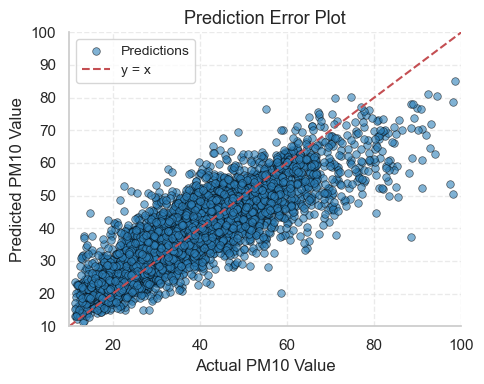

C:\Users\emin8\AppData\Local\Temp\ipykernel_29692\3491217356.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")


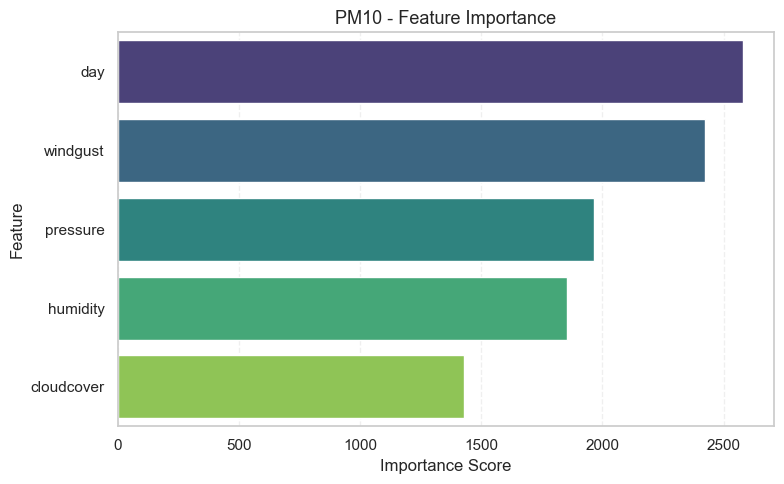

In [9]:
evaluate_lgbm_pm10(df)

In [ ]:
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error,
    median_absolute_error, mean_absolute_percentage_error,
    explained_variance_score, max_error, r2_score, make_scorer
)
from sklearn.model_selection import train_test_split, cross_validate, KFold
from lightgbm import LGBMRegressor
import numpy as np
import pandas as pd

def evaluate_lgbm_pm10_cv(df, target='PM10'):
    selected_features = [
        'temp', 'humidity', 'dew', 'windgust',
        'windspeed', 'pressure', 'cloudcover', 'visibility',
        'solarradiation', 'uvindex', 'weather_group_code',
        'hour', 'day', 'month', 'dayofweek', 'season',
        'wind_dir_rad', 'wind_dir_sin', 'wind_dir_cos',
        'is_weekend', 'is_nighttime', 'is_rush_hour',
    ]

    X = df[selected_features]
    y = df[target]

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    model = LGBMRegressor(
        n_estimators=750,
        learning_rate=0.1,
        max_depth=12,
        subsample=1,
        colsample_bytree=1,
        reg_alpha=1,
        reg_lambda=1,
        random_state=42
    )

    # Cross-validation (5-fold)
    cv = KFold(n_splits=7, shuffle=True, random_state=42)
    scoring = {
        'MAE': make_scorer(mean_absolute_error),
        'RMSE': make_scorer(mean_squared_error, greater_is_better=False),
        'R2': make_scorer(r2_score),
        'MAPE': make_scorer(mean_absolute_percentage_error),
        'MedAE': make_scorer(median_absolute_error)
    }

    cv_results = cross_validate(model, X_train, y_train, scoring=scoring, cv=cv, return_train_score=True)

    print("LightGBM (Optimize + CV) - PM10 Tahmini:")
    print(f"Train MAE (mean): {np.mean(cv_results['train_MAE']):.2f}")
    print(f"Test MAE  (mean): {np.mean(cv_results['test_MAE']):.2f}")
    print(f"Train RMSE (mean): {np.sqrt(-np.mean(cv_results['train_RMSE'])):.2f}")
    print(f"Test RMSE  (mean): {np.sqrt(-np.mean(cv_results['test_RMSE'])):.2f}")
    print(f"Train R² (mean): {np.mean(cv_results['train_R2']):.4f}")
    print(f"Test R²  (mean): {np.mean(cv_results['test_R2']):.4f}")
    print(f"Test MAPE (mean): {np.mean(cv_results['test_MAPE'])*100:.2f}%")
    print(f"Test Median AE (mean): {np.mean(cv_results['test_MedAE']):.2f}")

 
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    print(f"\nFinal Test MAE (Hold-out set): {mean_absolute_error(y_test, y_test_pred):.2f}")


In [12]:
evaluate_lgbm_pm10_cv(df)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000680 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 16307, number of used features: 22
[LightGBM] [Info] Start training from score 39.217770
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000597 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2219
[LightGBM] [Info] Number of data points in the train set: 16307, number of used features: 22
[LightGBM] [Info] Start training from score 39.239119
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000735 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 16307, number of used features: 22
[LightGBM] [Info] Start t